#in this part, i will delete draw the box plot, and delete all the outliers

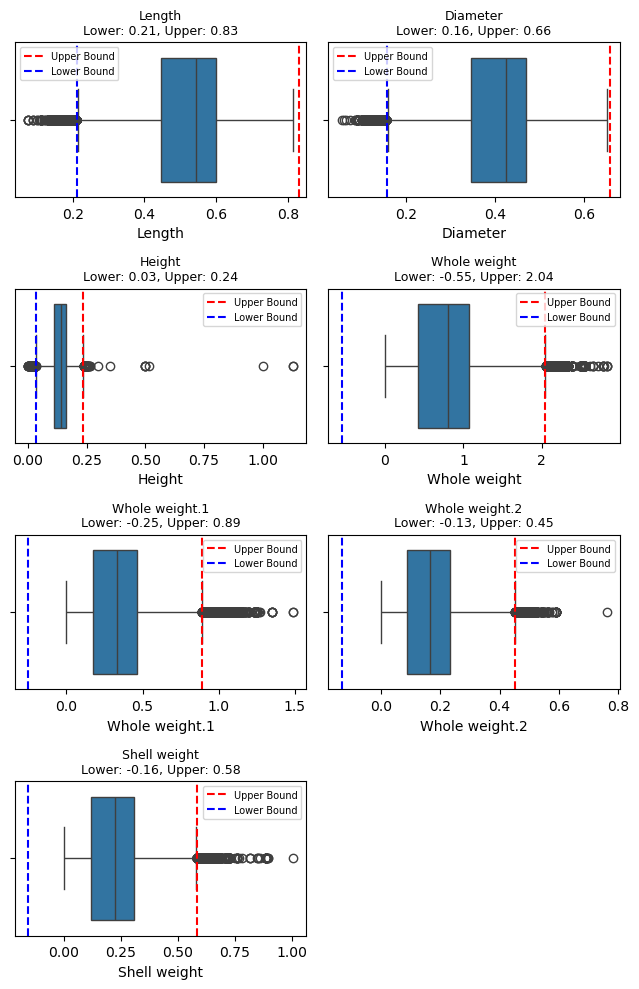

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv")

num_features = ['Length', 'Diameter', 'Height', 
                'Whole weight', 'Whole weight.1', 'Whole weight.2', 
                'Shell weight']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(6.5, 10))  # 适配 IEEE 单栏高度
axes = axes.flatten()

for i, col in enumerate(num_features):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
    axes[i].axvline(lower_bound, color='blue', linestyle='--', label='Lower Bound')
    axes[i].set_title(f'{col}\nLower: {lower_bound:.2f}, Upper: {upper_bound:.2f}', fontsize=9)
    axes[i].legend(fontsize=7)
    
# 去除最后一个空 subplot（如果特征数 < subplot 数）
if len(num_features) < len(axes):
    for j in range(len(num_features), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("all_boxplots.png", dpi=300)
plt.show()



generate_new_file_after deleting the outliers


In [22]:
df = pd.read_csv('train.csv')

num_features = ['Length', 'Diameter', 'Height', 
                'Whole weight', 'Whole weight.1', 'Whole weight.2', 
                'Shell weight']

outlier_index_set = set()

for col in num_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)].index
    outlier_index_set.update(outliers)

df_cleaned = df.drop(index=outlier_index_set).reset_index(drop=True)


df_cleaned.to_csv('train_cleaned.csv', index=False)

one_hot_code to deal with sex
    'M': '001',
    'F': '010',
    'I': '100'

In [34]:
import csv

df_cleaned = pd.read_csv('train_cleaned.csv')

sex_mapping = {
    'M': "001",
    'F': "010",
    'I': "100"
}
df_cleaned['Sex'] = df_cleaned['Sex'].map(sex_mapping)

df_cleaned['Sex'] = df_cleaned['Sex'].astype(str)

df_cleaned.to_csv('train_cleaned_sex_binary.csv', index=False, quoting=csv.QUOTE_ALL)